<a href="https://colab.research.google.com/github/hsargoli/MyWorks/blob/main/AboutData_practical_carDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[car dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/car/)

In [15]:
import numpy as np

In [131]:
# --------------
# read and prepare
# --------------
content_lines = []
with open("/content/drive/MyDrive/dataset/car.data", "r", encoding='utf-8') as content:
    for line in content:
      a = line.split(',')
      a = line.strip('\n')
      a = a.split(',')
      content_lines.append(a)

content_lines[:3]

[['vhigh', 'vhigh', '2', '2', 'small', 'low', 'unacc'],
 ['vhigh', 'vhigh', '2', '2', 'small', 'med', 'unacc'],
 ['vhigh', 'vhigh', '2', '2', 'small', 'high', 'unacc']]

In [132]:
# --------------
# create dataFrame 
# --------------
import pandas as pd
df = pd.DataFrame(content_lines, columns = ('buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'))
print(df.dtypes, end = '\n ----------')
df.describe()

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object
 ----------

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [27]:
df[df.isnull().any(axis = 1)]

# we dont have null members

,buying,maint,doors,persons,lug_boot,safety,class


In [28]:
print(df['buying'].value_counts(),
      df['maint'].value_counts(),
      df['doors'].value_counts(),
      df['persons'].value_counts(),
      df['lug_boot'].value_counts(),
      df['safety'].value_counts(),
      df['class'].value_counts(), sep = '\n ############ \n')

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
 ############ 
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
 ############ 
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
 ############ 
2       576
4       576
more    576
Name: persons, dtype: int64
 ############ 
small    576
med      576
big      576
Name: lug_boot, dtype: int64
 ############ 
low     576
med     576
high    576
Name: safety, dtype: int64
 ############ 
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


# ============================ https://pbpython.com/categorical-encoding.html
# Encoding
# ============================ 

In [100]:
# replace 
a = { 'buying' :{'vhigh':1000, 'high': 500, 'med':250, 'low': 100}}
newdf = df.replace(a)
newdf.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1000,vhigh,2,2,small,low,unacc
1,1000,vhigh,2,2,small,med,unacc
2,1000,vhigh,2,2,small,high,unacc
3,1000,vhigh,2,2,med,low,unacc
4,1000,vhigh,2,2,med,med,unacc


In [101]:
#  Label Encoding
# The nice aspect of this approach is that you get the benefits of pandas
# categories (compact data size, ability to order, plotting support) but 
# can easily be converted to numeric values for further analysis.
newdf['maint'] = newdf['maint'].astype('category')
newdf

,buying,maint,doors,persons,lug_boot,safety,class
0,1000,vhigh,2,2,small,low,unacc
1,1000,vhigh,2,2,small,med,unacc
2,1000,vhigh,2,2,small,high,unacc
3,1000,vhigh,2,2,med,low,unacc
4,1000,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,100,low,5more,more,med,med,good
1724,100,low,5more,more,med,high,vgood
1725,100,low,5more,more,big,low,unacc
1726,100,low,5more,more,big,med,good


In [146]:
# Ordinal encoding

from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
newdf['buying'] = ord_enc.fit_transform(newdf[['buying']])
newdf

,buying,maint,doors,lug_boot,class,safety_high,safety_low,safety_med,"(2,)","(4,)","(more,)"
0,3.0,2,2,small,2.0,0,1,0,1.0,0.0,0.0
1,3.0,2,2,small,2.0,0,0,1,1.0,0.0,0.0
2,3.0,2,2,small,2.0,1,0,0,1.0,0.0,0.0
3,3.0,2,2,med,2.0,0,1,0,1.0,0.0,0.0
4,3.0,2,2,med,2.0,0,0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1723,0.0,0,5more,med,1.0,0,0,1,0.0,0.0,1.0
1724,0.0,0,5more,med,3.0,1,0,0,0.0,0.0,1.0
1725,0.0,0,5more,big,2.0,0,1,0,0.0,0.0,1.0
1726,0.0,0,5more,big,1.0,0,0,1,0.0,0.0,1.0


In [103]:
# ONE HOT Encoding
a = pd.get_dummies(df['buying'])
a = np.array(a)
print(a)

newdf = pd.get_dummies(newdf, columns = ['safety'])
newdf

[[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 ...
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]]


,buying,maint,doors,persons,lug_boot,class,safety_high,safety_low,safety_med
0,1000,vhigh,2,2,small,2.0,0,1,0
1,1000,vhigh,2,2,small,2.0,0,0,1
2,1000,vhigh,2,2,small,2.0,1,0,0
3,1000,vhigh,2,2,med,2.0,0,1,0
4,1000,vhigh,2,2,med,2.0,0,0,1
...,...,...,...,...,...,...,...,...,...
1723,100,low,5more,more,med,1.0,0,0,1
1724,100,low,5more,more,med,3.0,1,0,0
1725,100,low,5more,more,big,2.0,0,1,0
1726,100,low,5more,more,big,1.0,0,0,1


In [104]:
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(newdf[["persons"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_)

,2,4,more
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
1723,0.0,0.0,1.0
1724,0.0,0.0,1.0
1725,0.0,0.0,1.0
1726,0.0,0.0,1.0


In [105]:
newdf = newdf.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))
newdf = newdf.drop(['persons'], axis = 1)
newdf

,buying,maint,doors,lug_boot,class,safety_high,safety_low,safety_med,"(2,)","(4,)","(more,)"
0,1000,vhigh,2,small,2.0,0,1,0,1.0,0.0,0.0
1,1000,vhigh,2,small,2.0,0,0,1,1.0,0.0,0.0
2,1000,vhigh,2,small,2.0,1,0,0,1.0,0.0,0.0
3,1000,vhigh,2,med,2.0,0,1,0,1.0,0.0,0.0
4,1000,vhigh,2,med,2.0,0,0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1723,100,low,5more,med,1.0,0,0,1,0.0,0.0,1.0
1724,100,low,5more,med,3.0,1,0,0,0.0,0.0,1.0
1725,100,low,5more,big,2.0,0,1,0,0.0,0.0,1.0
1726,100,low,5more,big,1.0,0,0,1,0.0,0.0,1.0


In [106]:
# Custom Encoding
newdf['maint'] = np.where(newdf['maint'].str.contains('vhigh'),2,0)
newdf

,buying,maint,doors,lug_boot,class,safety_high,safety_low,safety_med,"(2,)","(4,)","(more,)"
0,1000,2,2,small,2.0,0,1,0,1.0,0.0,0.0
1,1000,2,2,small,2.0,0,0,1,1.0,0.0,0.0
2,1000,2,2,small,2.0,1,0,0,1.0,0.0,0.0
3,1000,2,2,med,2.0,0,1,0,1.0,0.0,0.0
4,1000,2,2,med,2.0,0,0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1723,100,0,5more,med,1.0,0,0,1,0.0,0.0,1.0
1724,100,0,5more,med,3.0,1,0,0,0.0,0.0,1.0
1725,100,0,5more,big,2.0,0,1,0,0.0,0.0,1.0
1726,100,0,5more,big,1.0,0,0,1,0.0,0.0,1.0


In [107]:
# Select dtypes
#
print(newdf.dtypes)
newdf2 = newdf.select_dtypes(include=['uint8'])
newdf2

buying           int64
maint            int64
doors           object
lug_boot        object
class          float64
safety_high      uint8
safety_low       uint8
safety_med       uint8
(2,)           float64
(4,)           float64
(more,)        float64
dtype: object


,safety_high,safety_low,safety_med
0,0,1,0
1,0,0,1
2,1,0,0
3,0,1,0
4,0,0,1
...,...,...,...
1723,0,0,1
1724,1,0,0
1725,0,1,0
1726,0,0,1


----------


In [150]:
# Ordinal encoding

from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df['buying'] = ord_enc.fit_transform(df[['buying']])
df['maint'] = ord_enc.fit_transform(df[['maint']])
df['doors'] = ord_enc.fit_transform(df[['doors']])
df['persons'] = ord_enc.fit_transform(df[['persons']])
df['lug_boot'] = ord_enc.fit_transform(df[['lug_boot']])
df['safety'] = ord_enc.fit_transform(df[['safety']])
df['class'] = ord_enc.fit_transform(df[['class']])
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,1.0,2.0
1,3.0,3.0,0.0,0.0,2.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0,2.0
3,3.0,3.0,0.0,0.0,1.0,1.0,2.0
4,3.0,3.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...
1723,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1724,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1725,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1726,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [137]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
a = df.columns
for i in range(len(a)):
  print(str(a[i]))
  df2[str(a[i])] = ord_enc.fit_transform(df2[str(a[i])])


df2

buying


ValueError: ignored

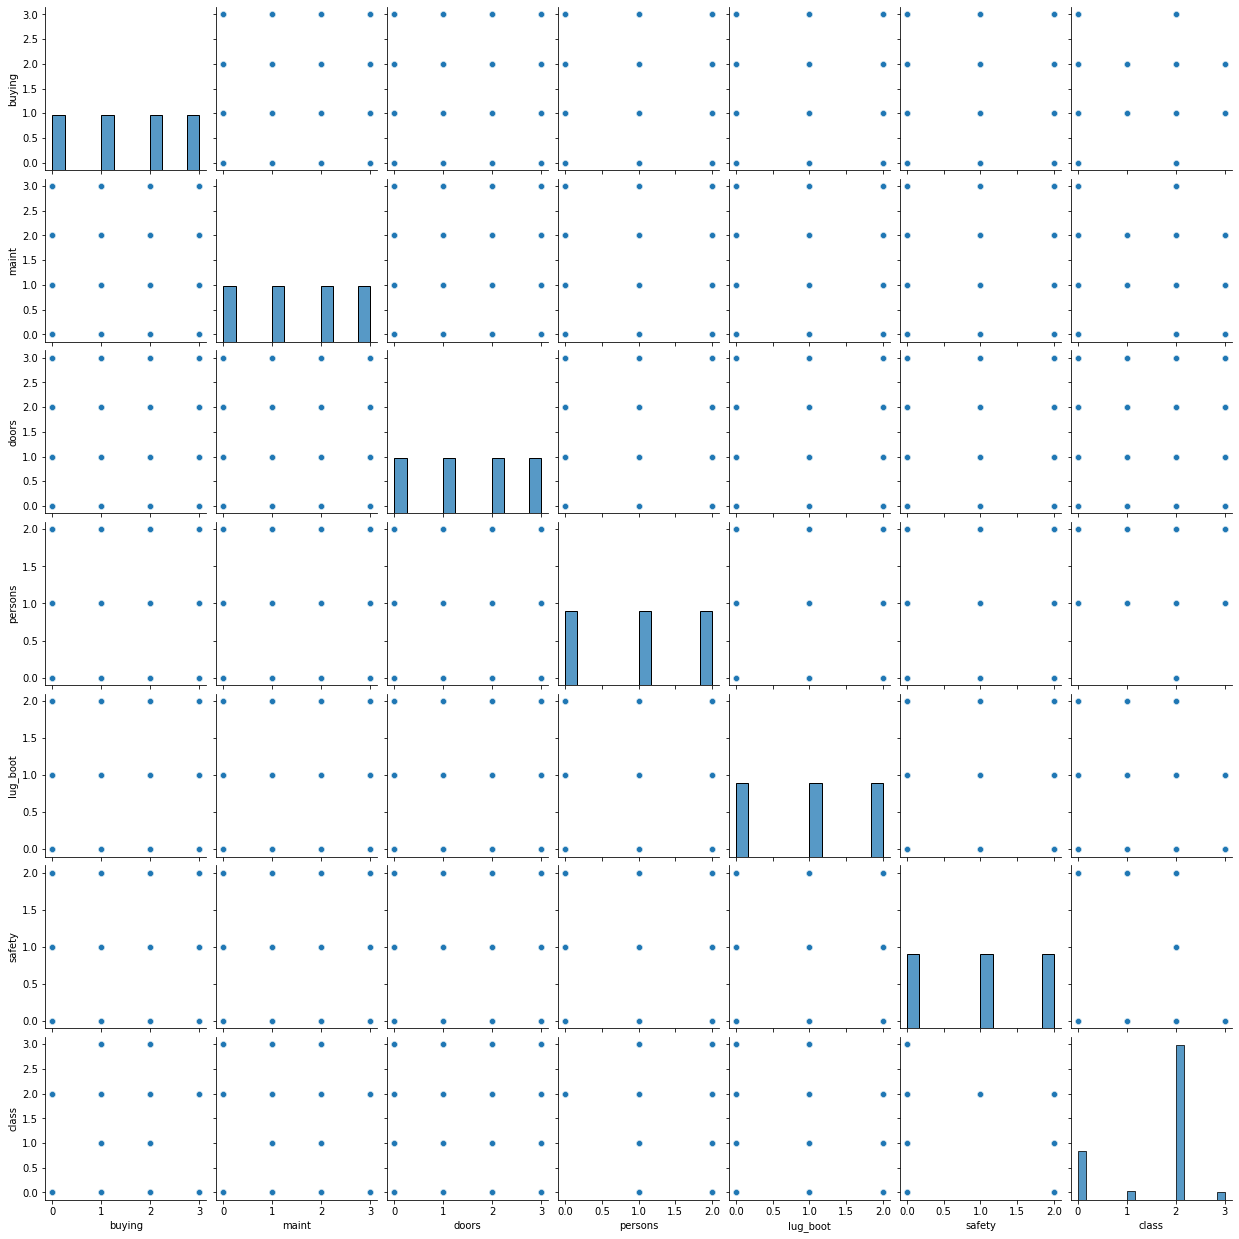

In [151]:
import seaborn as sb
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
sb.pairplot(df)

plt.show()

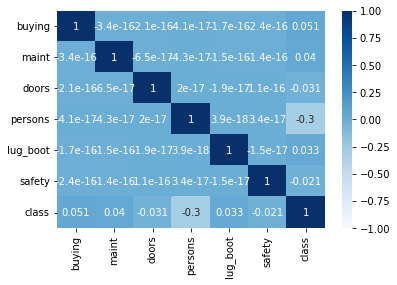

In [152]:
corr = df.corr() 
corrplot = sb.heatmap(corr, annot = True, cmap='Blues', xticklabels = corr.columns,
                      yticklabels = corr.columns, vmin = -1, vmax = +1)

to be continued ...